In [1]:
import h5py
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
from keras.models import model_from_json
from numpy import loadtxt
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# Read Data
#dataset=loadtxt("C:\\Users\\Admin\\urban_dataset\\metadata\\UrbanSound8K.csv",delimiter=',')
data = pd.read_csv('C:\\Users\\Admin\\urban_dataset\\metadata\\UrbanSound8K.csv')
data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
data.shape

(8732, 8)

In [3]:
# Get data over 3 seconds long
valid_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
valid_data.shape
valid_data1 = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
valid_data1.shape
valid_data1.head(5)

,slice_file_name,fold,classID,class
1,100263-2-0-117.wav,5,2,children_playing
2,100263-2-0-121.wav,5,2,children_playing
3,100263-2-0-126.wav,5,2,children_playing
4,100263-2-0-137.wav,5,2,children_playing
5,100263-2-0-143.wav,5,2,children_playing


In [15]:
# Example of a Siren spectrogram
y, sr = librosa.load('C:\\Users\\Admin\\urban_dataset\\fold6\\135160-8-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

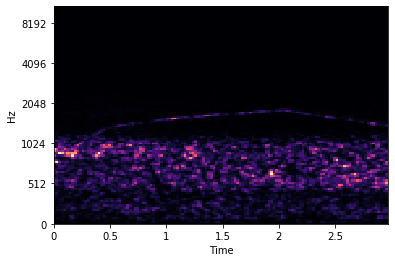

In [16]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [9]:
# Example of a AC spectrogram
y, sr = librosa.load('C:/Users/Admin/urban_dataset/fold1/134717-0-0-19.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

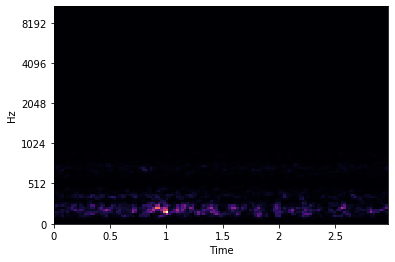

In [10]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [13]:
# Example of a children playing spectrogram
y, sr = librosa.load('C:/Users/Admin/urban_dataset/fold9/13579-2-0-16.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

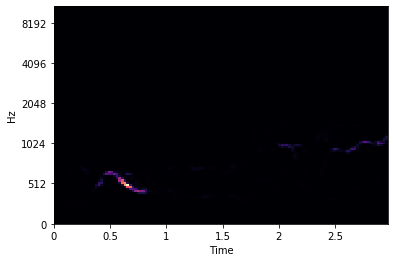

In [14]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [18]:
# Example of a drilling spectrogram
y, sr = librosa.load('C:/Users/Admin/urban_dataset/fold9/137815-4-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

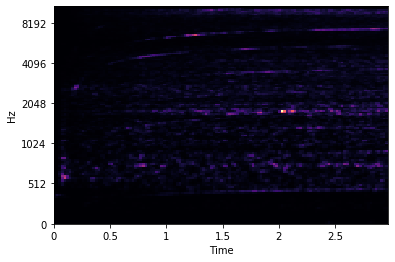

In [19]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [4]:
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')

In [5]:
D = [] # Dataset
for row in valid_data.itertuples():
    y, sr = librosa.load('C:/Users/Admin/urban_dataset/' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )   

In [6]:
print("Number of samples: ", len(D))

Number of samples:  7467


In [7]:
dataset = D
random.shuffle(dataset)

train = dataset[:7000]
test = dataset[7000:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test = np.array(keras.utils.to_categorical(y_test, 10))

In [8]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.fit(x=X_train,
          y=y_train,
          epochs=12,
          batch_size=128,
          validation_data= (X_test, y_test),
          verbose=0)
scores=model.evaluate(x=X_test,
                      y=y_test,
                      verbose=0)

print("ACCURACY: %.2f%%",(scores[1]*100))

ACCURACY: %.2f%% 84.36830837670435


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [10]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=12, batch_size=128)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Train on 7000 samples, validate on 467 samples
Epoch 1/12
7000/7000 [==============================] - 535s 76ms/step - loss: 3.0024 - acc: 0.1824 - val_loss: 2.2142 - val_acc: 0.2099
Epoch 2/12
7000/7000 [==============================] - 464s 66ms/step - loss: 2.1785 - acc: 0.2200 - val_loss: 1.9882 - val_acc: 0.3169
Epoch 3/12
7000/7000 [==============================] - 471s 67ms/step - loss: 1.9304 - acc: 0.3006 - val_loss: 1.6995 - val_acc: 0.3747
Epoch 4/12
7000/7000 [==============================] - 468s 67ms/step - loss: 1.7628 - acc: 0.3597 - val_loss: 1.5587 - val_acc: 0.4475
Epoch 5/12
7000/7000 [==============================] - 459s 66ms/step - loss: 1.6658 - acc: 0.4054 - val_loss: 1.4467 - val_acc: 0.4839
Epoch 6/12
7000/7000 [==============================] - 462s 66ms/step - loss: 1.5556 - acc: 0.4523 - val_loss: 1.3817 - val_acc: 0.5418
Epoch 7/12
7000/7000 [==============================] - 460s 66ms/step - loss: 1.5044 - acc: 0.4746 - val_loss: 1.2993 - val_acc: 0

<Figure size 640x480 with 1 Axes>

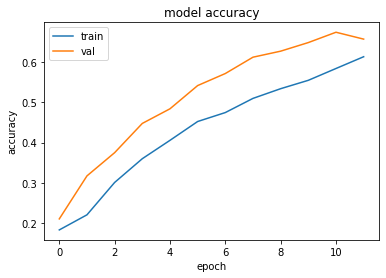

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

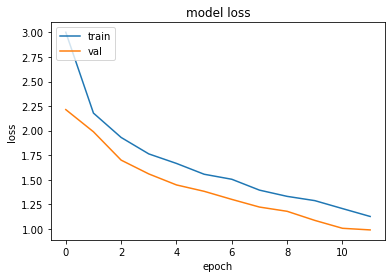

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:

model_json=model.to_json()
with open("model1.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("weights.h5")
print("Saved")

model.save("model.h5")
print("Saved model to disk")

Saved
Saved model to disk


In [32]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7000 samples, validate on 467 samples
Epoch 1/12
7000/7000 [==============================] - 526s 75ms/step - loss: 2.5332 - acc: 0.1784 - val_loss: 2.1524 - val_acc: 0.2677
Epoch 2/12
7000/7000 [==============================] - 468s 67ms/step - loss: 2.1108 - acc: 0.2669 - val_loss: 1.8621 - val_acc: 0.3747
Epoch 3/12
7000/7000 [==============================] - 459s 66ms/step - loss: 1.8388 - acc: 0.3429 - val_loss: 1.6778 - val_acc: 0.3919
Epoch 4/12
7000/7000 [==============================] - 470s 67ms/step - loss: 1.7245 - acc: 0.3854 - val_loss: 1.5637 - val_acc: 0.4668
Epoch 5/12
7000/7000 [==============================] - 461s 66ms/step - loss: 1.6279 - acc: 0.4100 - val_loss: 1.4720 - val_acc: 0.4989
Epoch 6/12
7000/7000 [==============================] - 468s 67ms/step - loss: 1.5349 - acc: 0.4567 - val_loss: 1.3550 - val_acc: 0.5161
Epoch 7/12
7000/7000 [==============================] - 476s 68ms/step - loss: 1.4509 - acc: 0.4830 - val_loss: 1.3045 - val_acc: 0

In [20]:
# load json and create model
json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("weights.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
score = loaded_model.evaluate(x=X_test,y=y_test, verbose=0)
print("ACCURACY %.2f%%" , (score[1]*100))


Loaded model from disk
ACCURACY %.2f%% 84.36830837670435


In [21]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset

# evaluate the model
score = model.evaluate(x=X_test,y=y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 24)      624       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 62, 24)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 31, 62, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 58, 48)        28848     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 29, 48)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 6, 29, 48)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 25, 48)        

In [35]:
y, sr = librosa.load('C:/Users/Admin/urban_dataset/fold1/14113-4-0-1.wav', duration=2.97)
y_changed = librosa.effects.time_stretch(y, rate=0.81)
librosa.output.write_wav('C:/Users/Admin/augmented/fold1/speed_81/14113-4-0-1.wav' ,y_changed, sr)

In [37]:
rate = 1.07 # replace with 0.81 and execute again

for row in valid_data.itertuples():
    y, sr = librosa.load('C:/Users/Admin/urban_dataset/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    librosa.output.write_wav('G:/augmented/fold' + str(row.fold) + '/speed_' + str(int(rate*100)) + '/' + row.slice_file_name ,y_changed, sr)

In [38]:
n_steps = 2 #-1, -2, 2, 1

for row in valid_data.itertuples():
    y, sr = librosa.load('C:/Users/Admin/urban_dataset/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav('G:/augmented/fold' + str(row.fold) + '/ps1_' + str(int(n_steps)) + '/' + row.slice_file_name ,y_changed, sr)

In [11]:
n_steps = 2.5 #-2.5, -3.5, 2.5, 3.5

for row in valid_data.itertuples():
    y, sr = librosa.load('C:/Users/Admin/urban_dataset/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav('G:/augmented/fold' + str(row.fold) + '/ps2_m' + str(int(n_steps*10)) + '/' + row.slice_file_name ,y_changed, sr)

In [12]:
rate = 0.81 # replace with 0.81 and execute again

for row in valid_data.itertuples():
    y, sr = librosa.load('C:/Users/Admin/urban_dataset/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    librosa.output.write_wav('G:/augmented/fold' + str(row.fold) + '/speed_' + str(int(rate*100)) + '/' + row.slice_file_name ,y_changed, sr)

In [25]:
valid_data1['path'] = 'fold' + valid_data['fold'].astype('str') + '/' +'speed_81/'+ valid_data['slice_file_name'].astype('str')

for row in valid_data1.itertuples():
    y, sr = librosa.load('G:/augmented/' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )

In [28]:
valid_data1['path'] = 'fold' + valid_data['fold'].astype('str') + '/' +'speed_107/'+ valid_data['slice_file_name'].astype('str')

for row in valid_data1.itertuples():
    y, sr = librosa.load('G:/augmented/' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )


In [26]:
valid_data1['path'] = 'fold' + valid_data['fold'].astype('str') + '/' +'ps1_2/'+ valid_data['slice_file_name'].astype('str')

for row in valid_data1.itertuples():
    y, sr = librosa.load('G:/augmented/' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )

In [30]:
valid_data1['path'] = 'fold' + valid_data['fold'].astype('str') + '/' +'ps2_m25/'+ valid_data['slice_file_name'].astype('str')

for row in valid_data1.itertuples():
    y, sr = librosa.load('G:/augmented/' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )

In [31]:
len(D)

37303

In [32]:
dataset = D
random.shuffle(dataset)

train = dataset[:35000]
test = dataset[35000:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test = np.array(keras.utils.to_categorical(y_test, 10))

In [33]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [34]:

model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35000 samples, validate on 2303 samples
Epoch 1/12
35000/35000 [==============================] - 4918s 141ms/step - loss: 2.0186 - acc: 0.3065 - val_loss: 1.4960 - val_acc: 0.4650
Epoch 2/12
35000/35000 [==============================] - 36086s 1s/step - loss: 1.4445 - acc: 0.4960 - val_loss: 1.2111 - val_acc: 0.5536
Epoch 3/12
35000/35000 [==============================] - 2868s 82ms/step - loss: 1.2039 - acc: 0.5838 - val_loss: 0.9834 - val_acc: 0.6665
Epoch 4/12
35000/35000 [==============================] - 3127s 89ms/step - loss: 1.0193 - acc: 0.6558 - val_loss: 0.8982 - val_acc: 0.6843
Epoch 5/12
35000/35000 [==============================] - 3184s 91ms/step - loss: 0.9060 - acc: 0.7000 - val_loss: 0.7276 - val_acc: 0.7647
Epoch 6/12
35000/35000 [==============================] - 3384s 97ms/step - loss: 0.8031 - acc: 0.7342 - val_loss: 0.6331 - val_acc: 0.7816
Epoch 7/12
35000/35000 [==============================] - 3092s 88ms/step - loss: 0.7462 - acc: 0.7581 - val_lo

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(actual, predicted) 
print 'Confusion Matrix :'
print(results) 
print 'Accuracy Score :',accuracy_score(actual, predicted) 
print 'Report : '
print classification_report(actual, predicted) 